In [1]:
from preprocessing import *

In [2]:
dir_params = os.path.join('calibration', 'parameters')

#err = np.load(os.path.join(dir,'err.npy'), allow_pickle=False)
K = np.load(os.path.join(dir_params,'K.npy'), allow_pickle=False)
#dist_coeffs = np.load(os.path.join(dir,'dist_coeffs.npy'), allow_pickle=False)
#rvecs = np.load(os.path.join(dir,'rvecs.npy'), allow_pickle=False)
#tvecs = np.load(os.path.join(dir,'tvecs.npy'), allow_pickle=False)

# LOAD DATA

In [3]:
trainsector = [
    sorted(glob('./data/F1/Images/*', recursive=False)),
    sorted(glob('./data/F2/Images/*', recursive=False)),
    sorted(glob('./data/F3/Images/*', recursive=False)),
    sorted(glob('./data/F4/Images/*', recursive=False)),
    sorted(glob('./data/F5/Images/*', recursive=False)),
    sorted(glob('./data/F6/Images/*', recursive=False)),
    sorted(glob('./data/F7/Images/*', recursive=False)),
    sorted(glob('./data/F8/Images/*', recursive=False)),
    sorted(glob('./data/F9/Images/*', recursive=False)),
    sorted(glob('./data/F10/Images/*', recursive=False)),
    sorted(glob('./data/F11/Images/*', recursive=False)),
]

trainlines = [se for e in trainsector for se in e]

testsector = [
    sorted(glob('./data/T1/Images/*', recursive=False)),
    sorted(glob('./data/T2/Images/*', recursive=False)),
    sorted(glob('./data/T3/Images/*', recursive=False)),
    sorted(glob('./data/T4/Images/*', recursive=False)),
    sorted(glob('./data/T5/Images/*', recursive=False)),
    sorted(glob('./data/T6/Images/*', recursive=False)),
    sorted(glob('./data/T7/Images/*', recursive=False)),
    sorted(glob('./data/T8/Images/*', recursive=False)),
]

testlines = [se for e in testsector for se in e]

In [4]:
trainimages_loc = [glob(line+"/*.tiff", recursive=False) for line in trainlines]
testimages_loc = [glob(line+"/*.tiff", recursive=False) for line in testlines]

trainlabels_loc = [os.path.join(*line.split("/")[:3],'Labels','Label'+line.split("/")[-1]+".json") for line in trainlines]
testlabels_loc = [os.path.join(*line.split("/")[:3],'Labels','Label'+line.split("/")[-1]+".json") for line in testlines]

trainposes_loc = [os.path.join(*line.split("/")[:3],'Poses',line.split("/")[-1]+".json") for line in trainlines]
testposes_loc = [os.path.join(*line.split("/")[:3],'Poses',line.split("/")[-1]+".json") for line in testlines]

# Test Integration

In [5]:
trainimages_loc[0]

['./data/F1/Images/1/20191024_094029.tiff',
 './data/F1/Images/1/20191024_094022.tiff',
 './data/F1/Images/1/20191024_094012.tiff',
 './data/F1/Images/1/20191024_094031.tiff',
 './data/F1/Images/1/20191024_093955.tiff',
 './data/F1/Images/1/20191024_094017.tiff',
 './data/F1/Images/1/20191024_093946.tiff',
 './data/F1/Images/1/20191024_094027.tiff',
 './data/F1/Images/1/20191024_094000.tiff',
 './data/F1/Images/1/20191024_094010.tiff',
 './data/F1/Images/1/20191024_093942.tiff',
 './data/F1/Images/1/20191024_094008.tiff',
 './data/F1/Images/1/20191024_093957.tiff',
 './data/F1/Images/1/20191024_093944.tiff',
 './data/F1/Images/1/20191024_094024.tiff',
 './data/F1/Images/1/20191024_094003.tiff',
 './data/F1/Images/1/20191024_094032.tiff',
 './data/F1/Images/1/20191024_094007.tiff',
 './data/F1/Images/1/20191024_094019.tiff',
 './data/F1/Images/1/20191024_094021.tiff',
 './data/F1/Images/1/20191024_093959.tiff',
 './data/F1/Images/1/20191024_093948.tiff',
 './data/F1/Images/1/20191024_09

In [6]:
trainline_images = imread(trainimages_loc[0])
trainlabel = json.load(open(trainlabels_loc[0], 'rb'))
trainpose = json.load(open(trainposes_loc[0], 'rb'))

In [7]:
# for trainimage in trainline_images:
#     show_image(trainimage)

In [8]:
M = []
for item in trainpose['images']:  # list of dictionaries
    M.append(np.array(item['M3x4']))
M = np.array(M)
M.shape

(27, 3, 4)

In [19]:
trainimages_loc[0][17]

'./data/F1/Images/1/20191024_094007.tiff'

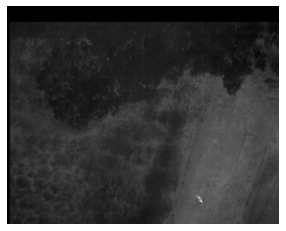

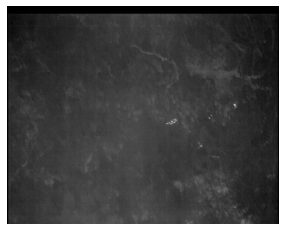

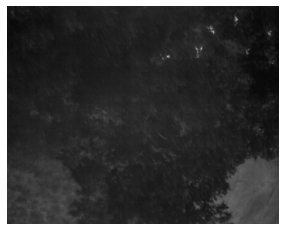

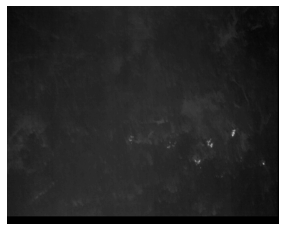

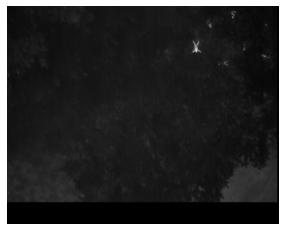

In [9]:
# Needs to better better defined
image_ids = list(range(13,18))
z = 30
integral = integrate(trainline_images, image_ids, K, M, z, verbose=True)

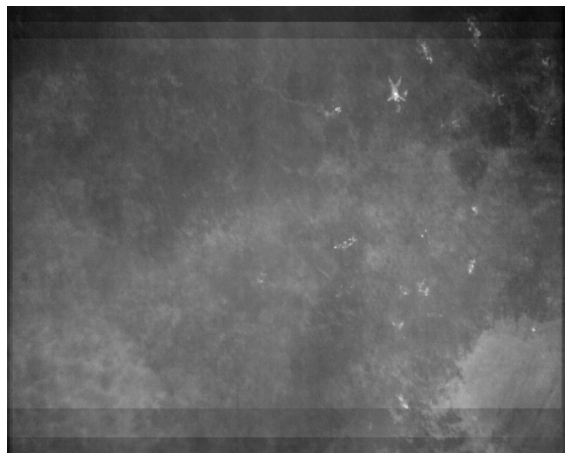

In [10]:
show_image(integral, cmap="gray", figsize=(10,10))

In [13]:
idx = find_file_index(trainline_images[0],trainline_images[0][16])

# extract poly annotations from json
polys = []
for item in trainlabel['Labels']:  # list of dictionaries
    polys.append(item['poly'])

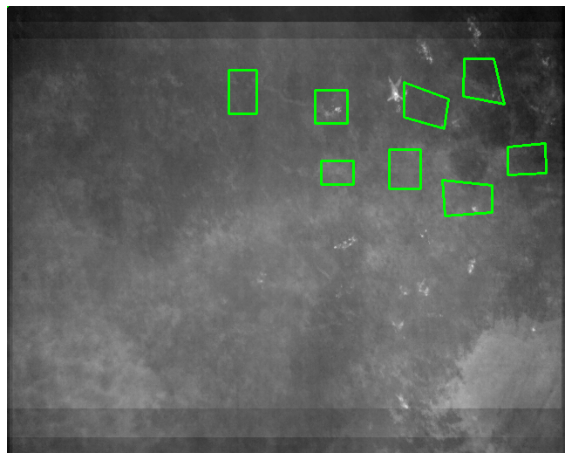

In [14]:
# integral image plus labels
show_image(annotate(integral, polys), figsize=(10, 15))

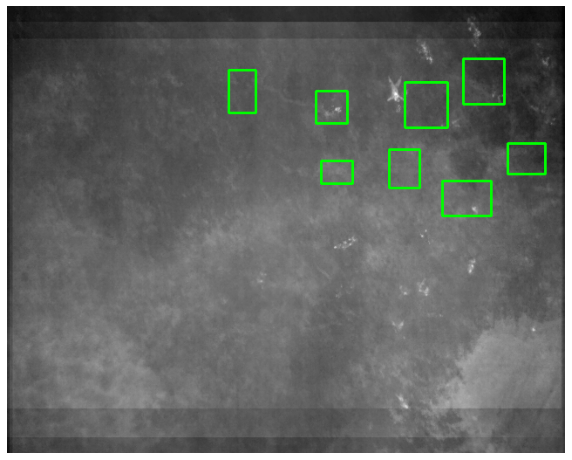

In [15]:
polys = [np.array(poly) for poly in polys]
bboxes = aabb(polys)

# here we already had AABB so nothing changed
show_image(annotate_aabb(integral, bboxes), figsize=(10, 15))

In [16]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(integral)

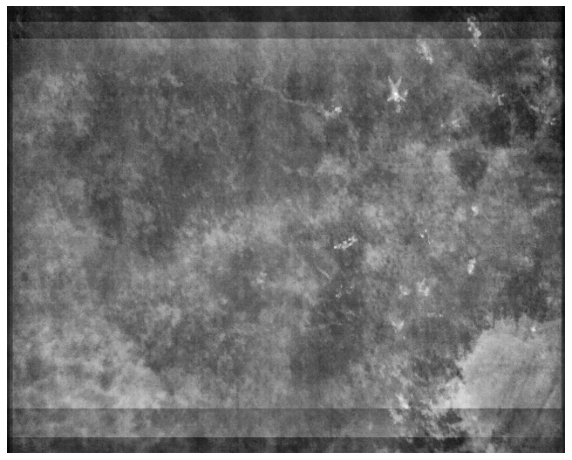

In [17]:
show_image(cl1, figsize=(10,10), cmap='gray')